# EDA of Reviewer Data

### imports


In [1]:
import pandas as pd
import numpy as np     
import matplotlib.pyplot as plt 
import seaborn as sns   
import json
import data_cleaning as dc

### load data frames

In [2]:
#data/yelp_academic_dataset_user.json 
#data/yelp_academic_dataset_review.json

In [3]:
users_df = dc.load("data/yelp_academic_dataset_user.json", 50000)
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [4]:
reviews_df = dc.load("data/yelp_academic_dataset_review.json", 50000)
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


# Average Number of Reviews per User (Average varies based on dataset)

In [7]:
# the average number of reviews per reviewer from users dataset
averageReviews = users_df["review_count"].mean()
print(f"Average # of reviews/user from user dataset: {averageReviews:.2f}")

# the average number of reviews per reviewer from reviews dataset
reviews_per_user = reviews_df["user_id"].value_counts()
averageReviews2 = reviews_per_user.mean()
print(f"Average # of reviews/reviewer from reviews dataset: {averageReviews2:.2f}")

Average # of reviews/user from user dataset: 23.39
Average # of reviews/reviewer from reviews dataset: 3.52


# Top Reviewers from user df

In [20]:
topReviewers = users_df.nlargest(10, "review_count")[["user_id", "name", "review_count"]]
print(topReviewers)

                       user_id      name  review_count
17169   Hi10sGSZNxQH3NLyWSZ1oA       Fox         17473
795339  8k3aO-mPeyhbR5HUucA5aA    Victor         16978
4723    hWDybu_KvYLSdEFzGrniTw     Bruce         16567
606393  RtGqdDBvvBCjcu5dUqwfzA     Shila         12868
152     P5bUL3Engv-2z6kKohB6qQ       Kim          9941
3977    nmdkHL2JKFx55T3nq5VziA    Nijole          8363
17727   bQCHF5rn5lMI9c5kEwCaNA   Vincent          8354
7394    8RcEwGrFIgkt9WQ35E6SnQ    George          7738
10873   Xwnf20FKuikiHcSpcEbpKQ   Kenneth          6766
1229    CxDOIDnH8gp9KXzpBHJYXw  Jennifer          6679


# Top Reviewers from merged df

In [21]:
topReviewers2 = reviews_df["user_id"].value_counts().nlargest(10).reset_index()
topReviewers2.columns = ["user_id", "review_count"]
topReviewers2 = topReviewers2.merge(users_df[["user_id", "name"]], on="user_id", how="left")
print(topReviewers2)


                  user_id  review_count      name
0  _BcWyKQL16ndpBdggh2kNA          3048     Karen
1  Xw7ZjaGfr0WNVt6s_5KZfA          1840  Marielle
2  0Igx-a1wAstiBDerGxXk2A          1747       Jen
3  -G7Zkl1wIWBBmD0KRy_sCw          1682    Gerald
4  ET8n-r7glWYqZhuR6GcdNw          1653  Michelle
5  bYENop4BuQepBjM1-BI3fA          1578    Steven
6  1HM81n6n4iPIFU5d2Lokhw          1554   Shannon
7  fr1Hz2acAb3OaL3l6DyKNg          1447      Boon
8  wXdbkFZsfDR7utJvbWElyA          1396       Ken
9  Um5bfs5DH6eizgjH3xZsvg          1391    Dianna


# Number of Users Grouped by their Number of Reviews

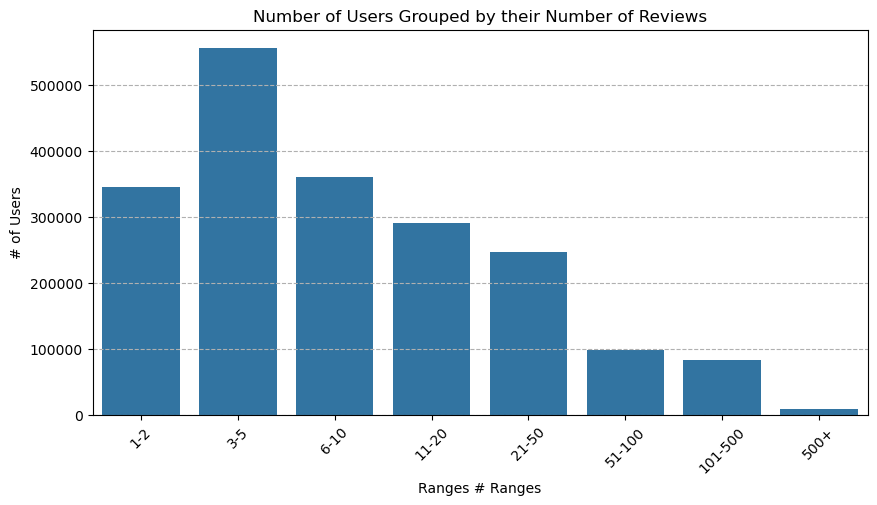

In [32]:
bins = [0, 2, 5, 10, 20, 50, 100, 500, float("inf")]
labels = ["1-2", "3-5", "6-10", "11-20", "21-50", "51-100", "101-500", "500+"]
users_df["review_category"] = pd.cut(users_df["review_count"], bins=bins, labels=labels, right=False, include_lowest=True)
review_counts = users_df["review_category"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=review_counts.index, y=review_counts.values)

plt.xlabel("Ranges # Ranges")
plt.ylabel("# of Users")
plt.title("Number of Users Grouped by their Number of Reviews")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")

plt.show()